# CEU-Net


Code and Paper by: Nicholas Soucy and Salimeh Yasaei Sekeh

## Imports & Dataset Functions

### Imports

In [1]:
#imports
import numpy as np
import keras
from tqdm import trange
import keras.utils
from keras.utils.np_utils import to_categorical
from keras import layers
from sklearn.model_selection import ShuffleSplit
import h5py
import spectral
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.io as io
import pandas as pd
import time
import random
from sklearn.metrics import cohen_kappa_score as kappa
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import keras.backend as K
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, Callback
from keras.layers import Conv2DTranspose, Add, Input, Concatenate, Layer, SeparableConv2D
from keras.layers import Dense, Activation, BatchNormalization, Dropout, LeakyReLU, Conv2D, Reshape
from keras.layers import Conv3D, Conv3DTranspose, PReLU, BatchNormalization, MaxPool3D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import sklearn.preprocessing as sp
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from operator import truediv

### Dataset Functions

In [2]:
#importing dataset functions

def import_IP():
  #Number of Classes = 16
  #import indian Pines dataset
  dataset = io.loadmat('Data/Indian_Pines/Indian_pines_corrected.mat')
  data = dataset['indian_pines_corrected']

  groundtruth = io.loadmat('Data/Indian_Pines/Indian_pines_gt.mat')
  gt = groundtruth['indian_pines_gt']

  dim_x, dim_y, dim_z = data.shape
  dim = dim_x * dim_y

  x = np.zeros(shape=(dim, dim_z))

  cont = 0
  for i in range(dim_x):
      for j in range(dim_y):
          x[cont, :] = data[i, j, :]
          cont += 1

  #normalize x data
  scaler = sp.MinMaxScaler()
  x = scaler.fit_transform(x)

  X = x.reshape(dim_x, dim_y, dim_z)

  return X, gt, 16, 'k', 2

def import_Bot():
  #Number of Classes = 14
  #import Botswana dataset
  dataset = io.loadmat('Data/Botswana/Botswana.mat')
  data = dataset['Botswana']

  groundtruth = io.loadmat('Data/Botswana/Botswana_gt.mat')
  gt = groundtruth['Botswana_gt']

  dim_x, dim_y, dim_z = data.shape
  dim = dim_x * dim_y

  x = np.zeros(shape=(dim, dim_z))

  cont = 0
  for i in range(dim_x):
      for j in range(dim_y):
          x[cont, :] = data[i, j, :]
          cont += 1

  #normalize x data
  scaler = sp.MinMaxScaler()
  x = scaler.fit_transform(x)

  X = x.reshape(dim_x, dim_y, dim_z)

  return X, gt, 14, 'k', 3


def import_KSC():
  #Number of classes = 13
  #import Kennedy Space Center dataset
  dataset = io.loadmat('Data/Kennedy_Space_Center/KSC.mat')
  data = dataset['KSC']

  groundtruth = io.loadmat('Data/Kennedy_Space_Center/KSC_gt.mat')
  gt = groundtruth['KSC_gt']

  dim_x, dim_y, dim_z = data.shape
  dim = dim_x * dim_y

  x = np.zeros(shape=(dim, dim_z))

  cont = 0
  for i in range(dim_x):
      for j in range(dim_y):
          x[cont, :] = data[i, j, :]
          cont += 1

  #normalize x data
  scaler = sp.MinMaxScaler()
  x = scaler.fit_transform(x)

  X = x.reshape(dim_x, dim_y, dim_z)

  return X, gt, 13, 'k', 2


def import_Sal():
  #Number of classes = 16
  #import Salinas dataset
  dataset = io.loadmat('Data/Salinas/Salinas_corrected.mat')
  data = dataset['salinas_corrected']

  groundtruth = io.loadmat('Data/Salinas/Salinas_gt.mat')
  gt = groundtruth['salinas_gt']

  dim_x, dim_y, dim_z = data.shape
  dim = dim_x * dim_y

  x = np.zeros(shape=(dim, dim_z))

  cont = 0
  for i in range(dim_x):
      for j in range(dim_y):
          x[cont, :] = data[i, j, :]
          cont += 1

  #normalize x data
  scaler = sp.MinMaxScaler()
  x = scaler.fit_transform(x)

  X = x.reshape(dim_x, dim_y, dim_z)

  return X, gt, 16, 'g', 3


def import_PavU():
  #Number of classes = 9
  #import Pavia University dataset
  dataset = io.loadmat('Data/Pavia_University/PaviaU.mat')
  data = dataset['paviaU']

  groundtruth = io.loadmat('Data/Pavia_University/PaviaU_gt.mat')
  gt = groundtruth['paviaU_gt']

  dim_x, dim_y, dim_z = data.shape
  dim = dim_x * dim_y

  x = np.zeros(shape=(dim, dim_z))

  cont = 0
  for i in range(dim_x):
      for j in range(dim_y):
          x[cont, :] = data[i, j, :]
          cont += 1

  #normalize x data
  scaler = sp.MinMaxScaler()
  x = scaler.fit_transform(x)

  X = x.reshape(dim_x, dim_y, dim_z)

  return X, gt, 9, 'k', 2


def import_Houston():
  #Number of Classes = 15
  #import Houston dataset
  dataset = io.loadmat('Data/Houston/Houston.mat')
  data = dataset['Houston']

  groundtruth = io.loadmat('Data/Houston/Houston_gt.mat')
  gt = groundtruth['gt']

  dim_x, dim_y, dim_z = data.shape
  dim = dim_x * dim_y

  x = np.zeros(shape=(dim, dim_z))

  cont = 0
  for i in range(dim_x):
      for j in range(dim_y):
          x[cont, :] = data[i, j, :]
          cont += 1

  #normalize x data
  scaler = sp.MinMaxScaler()
  x = scaler.fit_transform(x)

  X = x.reshape(dim_x, dim_y, dim_z)

  return X, gt, 15, 'g', 2


In [3]:
#Data reshaping Functions

def remove_background(data, gt):
  tmp_a = []
  for i in range(data.shape[0]):
    if gt[i] == 0:
      tmp_a.append(i)

  x = np.delete(data,tmp_a,0)
  y = np.delete(gt,tmp_a,0)
  return x, y

def remove_background_full(data, gt):
  tmp_a = []
  for i in range(data.shape[0]):
    if gt[i] == 0:
      tmp_a.append(i)

  x = np.delete(data,tmp_a,0)
  y = np.delete(gt,tmp_a,0)
  return x, y,tmp_a

def flatten(data, gt):
  #reshape data
  dim_x, dim_y, dim_z = data.shape
  dim = dim_x * dim_y

  x = np.zeros(shape=(dim, dim_z))
  y = gt


  cont = 0
  for i in range(dim_x):
      for j in range(dim_y):
          x[cont, :] = data[i, j, :]
          cont += 1

  y = np.reshape(y,(dim))


  #normalize x data
  scaler = sp.MinMaxScaler()
  x = scaler.fit_transform(x)

  return x, y


## Feature Reduction

### PCA

In [4]:
def PCA_DR(X, numComponents=30,return_model=False):
    newX = np.reshape(X, (-1, X.shape[2]))
    pca = PCA(n_components=numComponents, whiten=True)
    newX = pca.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    if return_model == True:
      return newX, pca
    else:
      return newX

## Classification

### Patching Functions

In [7]:
def padWithZeros(X, margin=2):
    newX = np.zeros((X.shape[0] + 2 * margin, X.shape[1] + 2* margin, X.shape[2]))
    x_offset = margin
    y_offset = margin
    newX[x_offset:X.shape[0] + x_offset, y_offset:X.shape[1] + y_offset, :] = X
    return newX

def createImageCubes(X, y, windowSize=5, removeZeroLabels = True):
    if windowSize % 2 == 0:
      margin = int((windowSize) / 2)
    else:
      margin = int((windowSize - 1) / 2)
    zeroPaddedX = padWithZeros(X, margin=margin)
    # split patches
    patchesData = np.zeros((X.shape[0] * X.shape[1], windowSize, windowSize, X.shape[2]))
    patchesLabels = np.zeros((X.shape[0] * X.shape[1]))
    patchIndex = 0
    for r in range(margin, zeroPaddedX.shape[0] - margin):
        for c in range(margin, zeroPaddedX.shape[1] - margin):
            if windowSize % 2 ==0:
              patch = zeroPaddedX[r - margin:r + margin, c - margin:c + margin]   
            else:
              patch = zeroPaddedX[r - margin:r + margin +1, c - margin:c + margin +1]
            patchesData[patchIndex, :, :, :] = patch
            patchesLabels[patchIndex] = y[r-margin, c-margin]
            patchIndex = patchIndex + 1
    if removeZeroLabels:
        patchesData = patchesData[patchesLabels>0,:,:,:]
        patchesLabels = patchesLabels[patchesLabels>0]
        patchesLabels -= 1
    return patchesData, patchesLabels


def Patch(data,height_index,width_index,ws=5):
    height_slice = slice(height_index, height_index+ws)
    width_slice = slice(width_index, width_index+ws)
    patch = data[height_slice, width_slice, :]
    
    return patch

### Unet

In [8]:
#Unet based on: https://github.com/thatbrguy/Hyperspectral-Image-Segmentation

def UNet_Conv(data,gt, num_epochs = 25, class_num = 16, ws = 10, return_all = False, folds = 5):

## GLOBAL VARIABLES
  windowSize = ws    #Default 25

  X_SN, y_SN = createImageCubes(data, gt, windowSize=windowSize)
  train_patches = X_SN
  train_patches_gt = y_SN
  train_patches_gt = to_categorical(train_patches_gt, num_classes=class_num)



  #impliment cross validation

  k = folds  #number of k-folds
  acc_arr = [0] * k 
  acc = 0

  ss = ShuffleSplit(n_splits=k, test_size=.15, random_state=0)

  train_i = [None] * k
  test_i = [None] * k

  ct = 0
  for train_index, test_index in ss.split(X = train_patches, y = train_patches_gt):
    train_i[ct] = train_index
    test_i[ct] = test_index
    ct += 1


  best_fold_acc = 0
  for q in range(k):
    x_train, x_test, y_train, y_test = train_patches[train_i[q]], train_patches[test_i[q]], train_patches_gt[train_i[q]], train_patches_gt[test_i[q]]
  

    class PixelSoftmax(Layer):
        """
        Pixelwise Softmax for Semantic Segmentation. Also known as
        4D Softmax in some sources. Applies Softmax along the last
        axis (-1 axis). 
        """
        def __init__(self, axis=-1, **kwargs):
            self.axis=axis
            super(PixelSoftmax, self).__init__(**kwargs)

        def get_config(self):
          config = super().get_config().copy()
          return config

        def build(self,input_shape):
            pass

        def call(self, x,mask=None):
            e = K.exp(x - K.max(x, axis=self.axis, keepdims=True))
            s = K.sum(e, axis=self.axis, keepdims=True)
            return e / s

        def get_output_shape_for(self, input_shape):
            return input_shape

    class statsLogger(Callback):
        """
        Saving loss and accuracy details to an array
        """
        def __init__(self):
            self.logs = []
        def on_epoch_end(self, epoch, logs):
            logs['epoch'] = epoch
            self.logs.append(logs)
        def get_config(self):
            config = super().get_config().copy()
            return config

    input_shape = x_train.shape[1:]
    img = Input(shape = input_shape)

    x = Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', name='conv1_2', use_bias=False)(img)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.2)(x)
    op1 = x

    x = Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', name='conv2_2', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.2)(x)
    op2 = x

    x = Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', name='conv3_2', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.2)(x)
    op3 = x

    x = Conv2DTranspose(256, kernel_size=(3,3), strides=(1,1), padding='same', name='deconv3', use_bias=False)(op3)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.2)(x)
    x = Concatenate(axis=-1)([x, op2])

    x = Conv2DTranspose(128, kernel_size=(3,3), strides=(1,1), padding='same', name='deconv2', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.2)(x)
    x = Concatenate(axis=-1)([x, op1])

    x = Conv2D(class_num, kernel_size=(3,3), strides=(windowSize,windowSize), padding='same', name='deconv1')(x)
    x = Reshape((1, class_num))(x)

    x = PixelSoftmax(axis=-1)(x)
    model = Model(inputs=img, outputs=x)


    y_test = y_test.reshape(y_test.shape[0],1,class_num)
    y_train = y_train.reshape(y_train.shape[0],1,class_num)


    history = statsLogger()
    opt = Adam(learning_rate = 0.0001, decay = 1e-4)


    model.compile(loss = 'categorical_crossentropy', 
                  optimizer = opt, 
                  metrics = ['accuracy'], 
                  sample_weight_mode = "temporal")


    hist = model.fit(x_train, 
            y_train, 
            batch_size = 256, 
            epochs = num_epochs, 
            validation_data = (x_test, y_test))



    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    acc_arr[q] = max(hist.history['val_accuracy'])

    if acc_arr[q] > best_fold_acc:
      best_x_train = x_train
      best_x_test = x_test
      best_y_train = y_train
      best_y_test = y_test
      best_model = model
      best_fold_acc = acc_arr[q]

  if(return_all):
    return (np.mean(acc_arr),best_x_train,best_x_test,best_y_train,best_y_test,best_model)
  else:
    return (np.mean(acc_arr))

### CEU-Net

#### K-Means Ensemble UNet

In [9]:
def K_Ensemble_UNet(data,gt,ds,num_epochs=25,class_num=16,clusters = 3, folds = 5, ws = 5, return_all = False):

  ## GLOBAL VARIABLES
  windowSize = ws    #Default 25

  def data_process(data,gt, tts='n'):


    X_SN, y_SN = createImageCubes(data, gt, windowSize=windowSize)
    train_patches = X_SN
    train_patches_gt = y_SN
    train_patches_gt = to_categorical(train_patches_gt, num_classes=class_num)



    x_train, x_test, y_train, y_test = train_test_split(train_patches, train_patches_gt, test_size=0.25, random_state=42)
    if tts == 'y':
      return (x_train, x_test, y_train, y_test)
    else:
      return (train_patches, train_patches_gt)
      
  def UNet_Conv_mid(data, gt, num_epochs = 25, class_num = 16):
    x_train = data
    y_train = gt

    class PixelSoftmax(Layer):
        """
        Pixelwise Softmax for Semantic Segmentation. Also known as
        4D Softmax in some sources. Applies Softmax along the last
        axis (-1 axis). 
        """
        def __init__(self, axis=-1, **kwargs):
            self.axis=axis
            super(PixelSoftmax, self).__init__(**kwargs)

        def get_config(self):
          config = super().get_config().copy()
          return config

        def build(self,input_shape):
            pass

        def call(self, x,mask=None):
            e = K.exp(x - K.max(x, axis=self.axis, keepdims=True))
            s = K.sum(e, axis=self.axis, keepdims=True)
            return e / s

        def get_output_shape_for(self, input_shape):
            return input_shape

    class statsLogger(Callback):
        """
        Saving loss and accuracy details to an array
        """
        def __init__(self):
            self.logs = []
        def on_epoch_end(self, epoch, logs):
            logs['epoch'] = epoch
            self.logs.append(logs)
        def get_config(self):
            config = super().get_config().copy()
            return config

    input_shape = x_train.shape[1:]
    img = Input(shape = input_shape)

    x = Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', name='conv1_2', use_bias=False)(img)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.2)(x)
    op1 = x

    x = Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', name='conv2_2', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.2)(x)
    op2 = x

    x = Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', name='conv3_2', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.2)(x)
    op3 = x

    x = Conv2DTranspose(256, kernel_size=(3,3), strides=(1,1), padding='same', name='deconv3', use_bias=False)(op3)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.2)(x)
    x = Concatenate(axis=-1)([x, op2])

    x = Conv2DTranspose(128, kernel_size=(3,3), strides=(1,1), padding='same', name='deconv2', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.2)(x)
    x = Concatenate(axis=-1)([x, op1])

    x = Conv2D(class_num, kernel_size=(3,3), strides=(windowSize,windowSize), padding='same', name='deconv1')(x)
    x = Reshape((1, class_num))(x)

    x = PixelSoftmax(axis=-1)(x)
    model = Model(inputs=img, outputs=x)


    y_train = y_train.reshape(y_train.shape[0],1,class_num)

    filepath_name = "best-model.hdf5"
    history = statsLogger()
    opt = Adam(learning_rate = 0.0001, decay = 1e-4)

    ckpt = ModelCheckpoint(filepath = filepath_name, 
                            save_best_only = True, 
                            verbose = 1, 
                            monitor = 'loss')

    model.compile(loss = 'categorical_crossentropy', 
                  optimizer = opt, 
                  metrics = ['accuracy'], 
                  sample_weight_mode = "temporal")

    hist = model.fit(x_train, 
            y_train, 
            batch_size = 256, 
            epochs = num_epochs,
            verbose = 1)


    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

    train_acc = max(hist.history['accuracy'])

    return model, train_acc


  x_patched, Y_patched = data_process(data, gt)

  x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_patched, Y_patched, test_size=0.15, random_state=42)
  y_train = y_train_p
  y_test = y_test_p
  x_train = x_train_p[:, 0, 0, :]
  x_test = x_test_p[:, 0, 0, :]

  # plt.scatter(data[:, 0], data[:, 1], cmap='viridis')
  # plt.title('Indian Pines')
  # plt.show()
  #Training
  K_model = KMeans(n_clusters=clusters)
  K_train_pred = K_model.fit_predict(x_train)
  centers = K_model.cluster_centers_
  # plt.scatter(x_train[:, 0], x_train[:, 1], c=K_train_pred, cmap='viridis')
  # plt.scatter(centers[:, 0], centers[:, 1], c='magenta', s=300, alpha=0.5)
  # plt.title('K-means Train')
  # plt.show()

  x_s = [None] * clusters
  y_s = [None] * clusters
  models = [None] * clusters
  accs = [None] * clusters

  for i in range(clusters):
    x_s[i] = np.zeros((x_train.shape[0], windowSize, windowSize, x_train.shape[1]))
    y_s[i] = np.zeros((y_train.shape[0], y_train.shape[1]))
    for j in range(y_train.shape[0]):
      if K_train_pred[j] == i:
        x_s[i][j] = x_train_p[j]
        y_s[i][j] = y_train_p[j]
    tmp_a = []
    for q in range(x_s[i].shape[0]):
      if np.all(x_s[i][q] == 0):
        tmp_a.append(q)
    x_s[i] = np.delete(x_s[i],tmp_a,0)
    y_s[i] = np.delete(y_s[i],tmp_a,0)

    models[i], accs[i] = UNet_Conv_mid(x_s[i],y_s[i], num_epochs = num_epochs, class_num = class_num)
    print("UNet Mid %2d Train Accuracy for Feature Count of %2d: %5.4f" % ((i+1),30,accs[i]))

  
  #Testing

  K_test_pred = K_model.predict(x_test)
  centers = K_model.cluster_centers_
  plt.scatter(x_test[:, 0], x_test[:, 1], c=K_test_pred, cmap='viridis')
  plt.scatter(centers[:, 0], centers[:, 1], c='magenta', s=300, alpha=0.5)
  plt.title('K-means Test')    
  plt.show()

  xt_s = [None] * clusters
  yt_s = [None] * clusters
  y_predicts = [None] * clusters


  for i in range(clusters):
    xt_s[i] = np.zeros((x_test.shape[0], windowSize, windowSize, x_test.shape[1]))
    yt_s[i] = np.zeros((y_test.shape[0], y_test.shape[1]))
    for j in range(y_test.shape[0]):
      if K_test_pred[j] == i:
        xt_s[i][j] = x_test_p[j]
        yt_s[i][j] = y_test_p[j]
    tmp_a = []
    for q in range(xt_s[i].shape[0]):
      if np.all(xt_s[i][q] == 0):
        tmp_a.append(q)
    xt_s[i] = np.delete(xt_s[i],tmp_a,0)
    yt_s[i] = np.delete(yt_s[i],tmp_a,0)

    y_predicts[i] = models[i].predict(xt_s[i])

  y_test_final_pred = y_predicts[0]
  y_test_final = yt_s[0]
  for i in range(1, clusters):
    y_test_final_pred = np.concatenate((y_test_final_pred,y_predicts[i]),axis = 0)
    y_test_final = np.concatenate((y_test_final,yt_s[i]),axis=0)

  y_true = y_test_final.reshape(y_test_final.shape[0],y_test_final.shape[-1])
  y_pred = y_test_final_pred.reshape(y_test_final_pred.shape[0],y_test_final_pred.shape[-1])
  # print("y_true shape: ",y_true.shape)
  # print("y_pred shape: ",y_pred.shape)

  m = tf.keras.metrics.TopKCategoricalAccuracy(k=1)
  m.update_state(y_true,y_pred)
  # print("K-Means Clusters = %2d Ensemble UNet Test Accuracy for Feature Count of %2d: %5.4f" % (clusters,30,m.result().numpy()))

  best_y_pred = y_pred
  best_y_test = y_true

  if(return_all):
    return (m.result().numpy(),best_y_pred,best_y_test,K_model,models)
  else:
    return (m.result().numpy())

#### GMM Ensemble UNet

In [10]:
def G_Ensemble_UNet(data,gt,ds,num_epochs=25,class_num=16,clusters = 3, folds = 5, ws = 5, return_all = False):

  ## GLOBAL VARIABLES
  test_ratio = 0.75
  windowSize = ws    #Default 25

  def data_process(data,gt, tts='n'):


    X_SN, y_SN = createImageCubes(data, gt, windowSize=windowSize)
    train_patches = X_SN
    train_patches_gt = y_SN
    train_patches_gt = to_categorical(train_patches_gt, num_classes=class_num)



    x_train, x_test, y_train, y_test = train_test_split(train_patches, train_patches_gt, test_size=0.15, random_state=42)
    if tts == 'y':
      return (x_train, x_test, y_train, y_test)
    else:
      return (train_patches, train_patches_gt)
      
  def UNet_Conv_mid(data, gt, num_epochs = 25, class_num = 16):
    x_train = data
    y_train = gt

    class PixelSoftmax(Layer):
        """
        Pixelwise Softmax for Semantic Segmentation. Also known as
        4D Softmax in some sources. Applies Softmax along the last
        axis (-1 axis). 
        """
        def __init__(self, axis=-1, **kwargs):
            self.axis=axis
            super(PixelSoftmax, self).__init__(**kwargs)

        def get_config(self):
          config = super().get_config().copy()
          return config

        def build(self,input_shape):
            pass

        def call(self, x,mask=None):
            e = K.exp(x - K.max(x, axis=self.axis, keepdims=True))
            s = K.sum(e, axis=self.axis, keepdims=True)
            return e / s

        def get_output_shape_for(self, input_shape):
            return input_shape

    class statsLogger(Callback):
        """
        Saving loss and accuracy details to an array
        """
        def __init__(self):
            self.logs = []
        def on_epoch_end(self, epoch, logs):
            logs['epoch'] = epoch
            self.logs.append(logs)
        def get_config(self):
            config = super().get_config().copy()
            return config

    input_shape = x_train.shape[1:]
    img = Input(shape = input_shape)

    x = Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', name='conv1_2', use_bias=False)(img)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.2)(x)
    op1 = x

    x = Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', name='conv2_2', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.2)(x)
    op2 = x

    x = Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', name='conv3_2', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.2)(x)
    op3 = x

    x = Conv2DTranspose(256, kernel_size=(3,3), strides=(1,1), padding='same', name='deconv3', use_bias=False)(op3)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.2)(x)
    x = Concatenate(axis=-1)([x, op2])

    x = Conv2DTranspose(128, kernel_size=(3,3), strides=(1,1), padding='same', name='deconv2', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Dropout(0.2)(x)
    x = Concatenate(axis=-1)([x, op1])

    x = Conv2D(class_num, kernel_size=(3,3), strides=(windowSize,windowSize), padding='same', name='deconv1')(x)
    x = Reshape((1, class_num))(x)

    x = PixelSoftmax(axis=-1)(x)
    model = Model(inputs=img, outputs=x)


    y_train = y_train.reshape(y_train.shape[0],1,class_num)

    filepath_name = "best-model.hdf5"
    history = statsLogger()
    opt = Adam(learning_rate = 0.0001, decay = 1e-4)

    ckpt = ModelCheckpoint(filepath = filepath_name, 
                            save_best_only = True, 
                            verbose = 1, 
                            monitor = 'loss')

    model.compile(loss = 'categorical_crossentropy', 
                  optimizer = opt, 
                  metrics = ['accuracy'], 
                  sample_weight_mode = "temporal")

    hist = model.fit(x_train, 
            y_train, 
            batch_size = 256, 
            epochs = num_epochs,
            verbose = 1)


    plt.plot(hist.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

    train_acc = max(hist.history['accuracy'])

    return model, train_acc


  x_patched, Y_patched = data_process(data, gt)

  x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(x_patched, Y_patched, test_size=0.25, random_state=42)
  y_train = y_train_p
  y_test = y_test_p
  x_train = x_train_p[:, 0, 0, :]
  x_test = x_test_p[:, 0, 0, :]

  # plt.scatter(data[:, 0], data[:, 1], cmap='viridis')
  # plt.title('Indian Pines')
  # plt.show()
  #Training
  G_model = GMM(n_components=clusters)
  G_train_pred = G_model.fit_predict(x_train)

  plt.show()

  x_s = [None] * clusters
  y_s = [None] * clusters
  models = [None] * clusters
  accs = [None] * clusters

  for i in range(clusters):
    x_s[i] = np.zeros((x_train.shape[0], windowSize, windowSize, x_train.shape[1]))
    y_s[i] = np.zeros((y_train.shape[0], y_train.shape[1]))
    for j in range(y_train.shape[0]):
      if G_train_pred[j] == i:
        x_s[i][j] = x_train_p[j]
        y_s[i][j] = y_train_p[j]
    tmp_a = []
    for q in range(x_s[i].shape[0]):
      if np.all(x_s[i][q] == 0):
        tmp_a.append(q)
    x_s[i] = np.delete(x_s[i],tmp_a,0)
    y_s[i] = np.delete(y_s[i],tmp_a,0)

    models[i], accs[i] = UNet_Conv_mid(x_s[i],y_s[i], num_epochs = num_epochs, class_num = class_num)
    print("UNet Mid %2d Train Accuracy for Feature Count of %2d: %5.4f" % ((i+1),30,accs[i]))

  
  #Testing

  G_test_pred = G_model.predict(x_test)

  xt_s = [None] * clusters
  yt_s = [None] * clusters
  y_predicts = [None] * clusters


  for i in range(clusters):
    xt_s[i] = np.zeros((x_test.shape[0], windowSize, windowSize, x_test.shape[1]))
    yt_s[i] = np.zeros((y_test.shape[0], y_test.shape[1]))
    for j in range(y_test.shape[0]):
      if G_test_pred[j] == i:
        xt_s[i][j] = x_test_p[j]
        yt_s[i][j] = y_test_p[j]
    tmp_a = []
    for q in range(xt_s[i].shape[0]):
      if np.all(xt_s[i][q] == 0):
        tmp_a.append(q)
    xt_s[i] = np.delete(xt_s[i],tmp_a,0)
    yt_s[i] = np.delete(yt_s[i],tmp_a,0)

    y_predicts[i] = models[i].predict(xt_s[i])

  y_test_final_pred = y_predicts[0]
  y_test_final = yt_s[0]
  for i in range(1, clusters):
    y_test_final_pred = np.concatenate((y_test_final_pred,y_predicts[i]),axis = 0)
    y_test_final = np.concatenate((y_test_final,yt_s[i]),axis=0)

  y_true = y_test_final.reshape(y_test_final.shape[0],y_test_final.shape[-1])
  y_pred = y_test_final_pred.reshape(y_test_final_pred.shape[0],y_test_final_pred.shape[-1])
  # print("y_true shape: ",y_true.shape)
  # print("y_pred shape: ",y_pred.shape)

  m = tf.keras.metrics.TopKCategoricalAccuracy(k=1)
  m.update_state(y_true,y_pred)
  # print("GMM Clusters = %2d Ensemble UNet Test Accuracy for Feature Count of %2d: %5.4f" % (clusters,30,m.result().numpy()))

  best_y_pred = y_pred
  best_y_test = y_true

  if(return_all):
    return (m.result().numpy(),best_y_pred,best_y_test,G_model,models)
  else:
    return (m.result().numpy())

## Testing Functions

In [11]:
def AA_andEachClassAccuracy(confusion_matrix):
  counter = confusion_matrix.shape[0]
  list_diag = np.diag(confusion_matrix)
  list_raw_sum = np.sum(confusion_matrix, axis=1)
  each_acc = np.nan_to_num(truediv(list_diag, list_raw_sum))
  average_acc = np.mean(each_acc)
  return each_acc, average_acc


def reports (X_test,y_test,name,model):
  #start = time.time()
  y_pred = model.predict(X_test)
  y_pred = y_pred.reshape(y_pred.shape[0],y_pred.shape[-1])
  y_test = y_test.reshape(y_test.shape[0],y_test.shape[-1])
  # y_pred = np.argmax(y_pred, axis=1)
  #end = time.time()
  #print(end - start)
  if name == 'Indian_Pines':
      target_names = ['Alfalfa', 'Corn Notill', 'Corn Mintill', 'Corn'
                      ,'Grass Pasture', 'Grass Trees', 'Grass Pasture Mowed', 
                      'Hay Windrowed', 'Oats', 'Soybean Notill', 'Soybean Mintill',
                      'Soybean Clean', 'Wheat', 'Woods', 'Buildings Grass Trees Drives',
                      'Stone Steel Towers']
  elif name == 'Salinas':
      target_names = ['Brocoli Green Weeds 1','Brocoli Green Weeds 2','Fallow','Fallow Rough Plow','Fallow Smooth',
                      'Stubble','Celery','Grapes Untrained','Soil Vinyard Develop','Corn Senesced Green Weeds',
                      'Lettuce Romaine 4wk','Lettuce Romaine 5wk','Lettuce Romaine 6wk','Lettuce Romaine 7wk',
                      'Vinyard Untrained','Vinyard Vertical Trellis']
  elif name == 'Pavia_University':
      target_names = ['Asphalt','Meadows','Gravel','Trees', 'Painted metal sheets','Bare Soil','Bitumen',
                      'Self-Blocking Bricks','Shadows']

  elif name == 'Kennedy_Space_Center':
      target_names = ['Scrub','Willow Swamp','CP Hammock', 'Slash Pine', 'Oak/Broadleaf','Hardwood',
                      'Swamp','Graminoid Marsh','Spartina Marsh','Cattail Marsh','Salt Marsh','Mud Flats','Water']
  
  elif name == 'Botswana':
      target_names = ['Water','Hippo Grass','Floodplain Grasses 1','Floodplain Grasses 2','Reeds 1','Riparian',
                      'Firescar 2','Island Interior','Acacia Woodlands','Acacia Shrublands','Acacia Grasslands',
                      'Short Mopane','Mixed Mopane','Exposed Soils']
    
  elif name == 'Houston':
      target_names = ['Healthy Grass','Stressed Grass','Artificial Turf','Trees','Soil','Water',
                      'Residential','Commercial','Roads','Highway','Railways','Parking Lot 1',
                      'Parking Lot 2','Tennis Court','Running Track']
  
  #handle different outputs from hybridSN vs U-Nets
  classification = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_names)
  oa = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
  confusion = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
  confusion = pd.DataFrame(confusion, index=target_names, columns=target_names)
  each_acc, aa = AA_andEachClassAccuracy(confusion)
  kappa = cohen_kappa_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
  y_test = y_test.reshape(y_test.shape[0],1,y_test.shape[-1])
  score = model.evaluate(X_test, y_test, batch_size=32)
  Test_Loss =  score[0]*100
  Test_accuracy = score[1]*100
  
  return classification, confusion, Test_Loss, Test_accuracy, oa*100, each_acc*100, aa*100, kappa*100

def reports_CE (y_prediction,y_test,name):
  y_pred = y_prediction.reshape(y_prediction.shape[0],y_prediction.shape[-1])
  y_test = y_test.reshape(y_test.shape[0],y_test.shape[-1])
  # y_pred = np.argmax(y_pred, axis=1)
  #end = time.time()
  #print(end - start)
  if name == 'Indian_Pines':
      target_names = ['Alfalfa', 'Corn Notill', 'Corn Mintill', 'Corn'
                      ,'Grass Pasture', 'Grass Trees', 'Grass Pasture Mowed', 
                      'Hay Windrowed', 'Oats', 'Soybean Notill', 'Soybean Mintill',
                      'Soybean Clean', 'Wheat', 'Woods', 'Buildings Grass Trees Drives',
                      'Stone Steel Towers']
  elif name == 'Salinas':
      target_names = ['Brocoli Green Weeds 1','Brocoli Green Weeds 2','Fallow','Fallow Rough Plow','Fallow Smooth',
                      'Stubble','Celery','Grapes Untrained','Soil Vinyard Develop','Corn Senesced Green Weeds',
                      'Lettuce Romaine 4wk','Lettuce Romaine 5wk','Lettuce Romaine 6wk','Lettuce Romaine 7wk',
                      'Vinyard Untrained','Vinyard Vertical Trellis']
  elif name == 'Pavia_University':
      target_names = ['Asphalt','Meadows','Gravel','Trees', 'Painted metal sheets','Bare Soil','Bitumen',
                      'Self-Blocking Bricks','Shadows']

  elif name == 'Kennedy_Space_Center':
      target_names = ['Scrub','Willow Swamp','CP Hammock', 'Slash Pine', 'Oak/Broadleaf','Hardwood',
                      'Swamp','Graminoid Marsh','Spartina Marsh','Cattail Marsh','Salt Marsh','Mud Flats','Water']
  
  elif name == 'Botswana':
      target_names = ['Water','Hippo Grass','Floodplain Grasses 1','Floodplain Grasses 2','Reeds 1','Riparian',
                      'Firescar 2','Island Interior','Acacia Woodlands','Acacia Shrublands','Acacia Grasslands',
                      'Short Mopane','Mixed Mopane','Exposed Soils']
    
  elif name == 'Houston':
      target_names = ['Healthy Grass','Stressed Grass','Artificial Turf','Trees','Soil','Water',
                      'Residential','Commercial','Roads','Highway','Railways','Parking Lot 1',
                      'Parking Lot 2','Tennis Court','Running Track']


  classification = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), target_names=target_names)
  oa = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
  confusion = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
  confusion = pd.DataFrame(confusion, index=target_names, columns=target_names)
  each_acc, aa = AA_andEachClassAccuracy(confusion)
  kappa = cohen_kappa_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
  
  return classification, confusion, oa*100, each_acc*100, aa*100, kappa*100

## Example

### Data

Import data (for this example we import the indian pines dataset).

In [12]:
dataset = ["Indian_Pines","Salinas","Pavia_University","Kennedy_Space_Center","Botswana","Houston"]
X, Y, cls, en_type, clusters = import_PavU()
ds = 2
patch_size = 1   #1 means no patching

print(dataset[ds])
print(X.shape, Y.shape)

Pavia_University
(610, 340, 103) (610, 340)


Apply feature reduction on data.

In [13]:
#Number of features we wish to reduce to
feature_count = 30

#Apply PCA
x,pca_model = PCA_DR(X, feature_count,return_model = True)
y=Y

# #Apply 2D CAE
# x,y = CAE_3D(X,Y,num_epochs=100,dim=30)

# #Apply 3D CAE
# x,y = CAE_2D(X,Y,num_epochs=150,dim=30)

print(x.shape,y.shape)

(610, 340, 30) (610, 340)


### Training

Train Single U-Net model

Epoch 1/150
143/143 [==============================] - 9s 66ms/step - loss: 1.3804 - accuracy: 0.6059 - val_loss: 1.8634 - val_accuracy: 0.6417
Epoch 2/150
143/143 [==============================] - 10s 67ms/step - loss: 0.8067 - accuracy: 0.7609 - val_loss: 0.9679 - val_accuracy: 0.7642
Epoch 3/150
143/143 [==============================] - 9s 64ms/step - loss: 0.6115 - accuracy: 0.8037 - val_loss: 0.5204 - val_accuracy: 0.8493
Epoch 4/150
143/143 [==============================] - 10s 70ms/step - loss: 0.5081 - accuracy: 0.8292 - val_loss: 0.3757 - val_accuracy: 0.8786
Epoch 5/150
143/143 [==============================] - 10s 73ms/step - loss: 0.4346 - accuracy: 0.8511 - val_loss: 0.3051 - val_accuracy: 0.8934
Epoch 6/150
143/143 [==============================] - 10s 70ms/step - loss: 0.3887 - accuracy: 0.8647 - val_loss: 0.2727 - val_accuracy: 0.9029
Epoch 7/150
143/143 [==============================] - 10s 70ms/step - loss: 0.3500 - accuracy: 0.8796 - val_loss: 0.2450 - val_accu

143/143 [==============================] - 9s 64ms/step - loss: 0.1699 - accuracy: 0.9360 - val_loss: 0.1248 - val_accuracy: 0.9523
Epoch 58/150
143/143 [==============================] - 9s 64ms/step - loss: 0.1724 - accuracy: 0.9360 - val_loss: 0.1232 - val_accuracy: 0.9536
Epoch 59/150
143/143 [==============================] - 9s 63ms/step - loss: 0.1670 - accuracy: 0.9379 - val_loss: 0.1230 - val_accuracy: 0.9539
Epoch 60/150
143/143 [==============================] - 9s 64ms/step - loss: 0.1640 - accuracy: 0.9387 - val_loss: 0.1248 - val_accuracy: 0.9532
Epoch 61/150
143/143 [==============================] - 9s 63ms/step - loss: 0.1661 - accuracy: 0.9383 - val_loss: 0.1223 - val_accuracy: 0.9539
Epoch 62/150
143/143 [==============================] - 9s 63ms/step - loss: 0.1637 - accuracy: 0.9387 - val_loss: 0.1238 - val_accuracy: 0.9534
Epoch 63/150
143/143 [==============================] - 9s 64ms/step - loss: 0.1637 - accuracy: 0.9394 - val_loss: 0.1231 - val_accuracy: 0.952

143/143 [==============================] - 9s 63ms/step - loss: 0.1473 - accuracy: 0.9446 - val_loss: 0.1125 - val_accuracy: 0.9573
Epoch 114/150
143/143 [==============================] - 9s 62ms/step - loss: 0.1489 - accuracy: 0.9437 - val_loss: 0.1141 - val_accuracy: 0.9571
Epoch 115/150
143/143 [==============================] - 9s 62ms/step - loss: 0.1452 - accuracy: 0.9450 - val_loss: 0.1126 - val_accuracy: 0.9581
Epoch 116/150
143/143 [==============================] - 9s 63ms/step - loss: 0.1498 - accuracy: 0.9446 - val_loss: 0.1153 - val_accuracy: 0.9565
Epoch 117/150
143/143 [==============================] - 9s 63ms/step - loss: 0.1455 - accuracy: 0.9459 - val_loss: 0.1133 - val_accuracy: 0.9570
Epoch 118/150
143/143 [==============================] - 9s 63ms/step - loss: 0.1455 - accuracy: 0.9452 - val_loss: 0.1130 - val_accuracy: 0.9582
Epoch 119/150
143/143 [==============================] - 9s 63ms/step - loss: 0.1480 - accuracy: 0.9460 - val_loss: 0.1119 - val_accuracy:

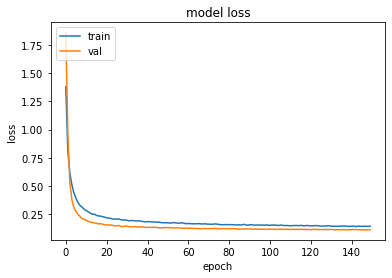

In [14]:
#UNet

UNet_acc,best_x_train,best_x_test,best_y_train,best_y_test,best_model = UNet_Conv(x,y, num_epochs = 150, class_num = cls,return_all = True,ws = patch_size, folds = 1)


Train CEU-Net Model

Epoch 1/200
5/5 [==============================] - 0s 41ms/step - loss: 2.2623 - accuracy: 0.0889
Epoch 2/200
5/5 [==============================] - 0s 40ms/step - loss: 2.2117 - accuracy: 0.1150
Epoch 3/200
5/5 [==============================] - 0s 42ms/step - loss: 2.1582 - accuracy: 0.1429
Epoch 4/200
5/5 [==============================] - 0s 44ms/step - loss: 2.0994 - accuracy: 0.2125
Epoch 5/200
5/5 [==============================] - 0s 46ms/step - loss: 2.0552 - accuracy: 0.2491
Epoch 6/200
5/5 [==============================] - 0s 43ms/step - loss: 2.0127 - accuracy: 0.3214
Epoch 7/200
5/5 [==============================] - 0s 44ms/step - loss: 1.9601 - accuracy: 0.3850
Epoch 8/200
5/5 [==============================] - 0s 44ms/step - loss: 1.9090 - accuracy: 0.4460
Epoch 9/200
5/5 [==============================] - 0s 43ms/step - loss: 1.8639 - accuracy: 0.5261
Epoch 10/200
5/5 [==============================] - 0s 44ms/step - loss: 1.8123 - accuracy: 0.6220
Epoch 11/200
5/5 [=

5/5 [==============================] - 0s 48ms/step - loss: 0.2222 - accuracy: 1.0000
Epoch 84/200
5/5 [==============================] - 0s 48ms/step - loss: 0.2170 - accuracy: 1.0000
Epoch 85/200
5/5 [==============================] - 0s 46ms/step - loss: 0.2114 - accuracy: 1.0000
Epoch 86/200
5/5 [==============================] - 0s 45ms/step - loss: 0.2054 - accuracy: 1.0000
Epoch 87/200
5/5 [==============================] - 0s 46ms/step - loss: 0.1978 - accuracy: 1.0000
Epoch 88/200
5/5 [==============================] - 0s 45ms/step - loss: 0.1943 - accuracy: 1.0000
Epoch 89/200
5/5 [==============================] - 0s 46ms/step - loss: 0.1886 - accuracy: 1.0000
Epoch 90/200
5/5 [==============================] - 0s 45ms/step - loss: 0.1916 - accuracy: 1.0000
Epoch 91/200
5/5 [==============================] - 0s 45ms/step - loss: 0.1813 - accuracy: 1.0000
Epoch 92/200
5/5 [==============================] - 0s 44ms/step - loss: 0.1799 - accuracy: 1.0000
Epoch 93/200
5/5 [=====

5/5 [==============================] - 0s 43ms/step - loss: 0.0530 - accuracy: 1.0000
Epoch 166/200
5/5 [==============================] - 0s 44ms/step - loss: 0.0527 - accuracy: 1.0000
Epoch 167/200
5/5 [==============================] - 0s 44ms/step - loss: 0.0509 - accuracy: 1.0000
Epoch 168/200
5/5 [==============================] - 0s 43ms/step - loss: 0.0500 - accuracy: 1.0000
Epoch 169/200
5/5 [==============================] - 0s 43ms/step - loss: 0.0494 - accuracy: 1.0000
Epoch 170/200
5/5 [==============================] - 0s 43ms/step - loss: 0.0492 - accuracy: 1.0000
Epoch 171/200
5/5 [==============================] - 0s 43ms/step - loss: 0.0491 - accuracy: 1.0000
Epoch 172/200
5/5 [==============================] - 0s 43ms/step - loss: 0.0484 - accuracy: 1.0000
Epoch 173/200
5/5 [==============================] - 0s 44ms/step - loss: 0.0465 - accuracy: 1.0000
Epoch 174/200
5/5 [==============================] - 0s 43ms/step - loss: 0.0475 - accuracy: 1.0000
Epoch 175/200


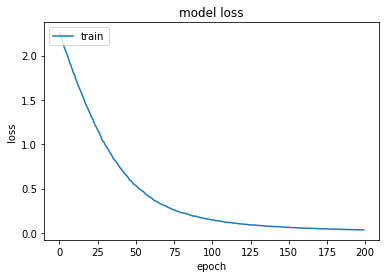

UNet Mid  1 Train Accuracy for Feature Count of 30: 1.0000
Epoch 1/200
138/138 [==============================] - 9s 63ms/step - loss: 1.3517 - accuracy: 0.6186
Epoch 2/200
138/138 [==============================] - 8s 61ms/step - loss: 0.7655 - accuracy: 0.7744
Epoch 3/200
138/138 [==============================] - 8s 59ms/step - loss: 0.5770 - accuracy: 0.8167
Epoch 4/200
138/138 [==============================] - 8s 61ms/step - loss: 0.4705 - accuracy: 0.8429 0s - loss: 0.473
Epoch 5/200
138/138 [==============================] - 8s 61ms/step - loss: 0.4073 - accuracy: 0.8620
Epoch 6/200
138/138 [==============================] - 8s 60ms/step - loss: 0.3619 - accuracy: 0.8745
Epoch 7/200
138/138 [==============================] - 8s 60ms/step - loss: 0.3312 - accuracy: 0.8847
Epoch 8/200
138/138 [==============================] - 8s 61ms/step - loss: 0.3099 - accuracy: 0.8916
Epoch 9/200
138/138 [==============================] - 8s 61ms/step - loss: 0.2874 - accuracy: 0.8969
Epoch 

138/138 [==============================] - 8s 60ms/step - loss: 0.1459 - accuracy: 0.9442
Epoch 80/200
138/138 [==============================] - 8s 61ms/step - loss: 0.1426 - accuracy: 0.9454
Epoch 81/200
138/138 [==============================] - 8s 60ms/step - loss: 0.1451 - accuracy: 0.9456
Epoch 82/200
138/138 [==============================] - 8s 61ms/step - loss: 0.1412 - accuracy: 0.9468
Epoch 83/200
138/138 [==============================] - 8s 61ms/step - loss: 0.1415 - accuracy: 0.9482
Epoch 84/200
138/138 [==============================] - 8s 60ms/step - loss: 0.1409 - accuracy: 0.9475
Epoch 85/200
138/138 [==============================] - 8s 62ms/step - loss: 0.1433 - accuracy: 0.9466
Epoch 86/200
138/138 [==============================] - 8s 60ms/step - loss: 0.1406 - accuracy: 0.9471
Epoch 87/200
138/138 [==============================] - 8s 61ms/step - loss: 0.1401 - accuracy: 0.9476
Epoch 88/200
138/138 [==============================] - 8s 61ms/step - loss: 0.1379 - 

138/138 [==============================] - 8s 62ms/step - loss: 0.1282 - accuracy: 0.9515
Epoch 159/200
138/138 [==============================] - 8s 61ms/step - loss: 0.1272 - accuracy: 0.9514
Epoch 160/200
138/138 [==============================] - 8s 61ms/step - loss: 0.1288 - accuracy: 0.9521
Epoch 161/200
138/138 [==============================] - 8s 60ms/step - loss: 0.1274 - accuracy: 0.9517
Epoch 162/200
138/138 [==============================] - 8s 60ms/step - loss: 0.1264 - accuracy: 0.9528
Epoch 163/200
138/138 [==============================] - 8s 59ms/step - loss: 0.1261 - accuracy: 0.9526
Epoch 164/200
138/138 [==============================] - 8s 60ms/step - loss: 0.1257 - accuracy: 0.9524
Epoch 165/200
138/138 [==============================] - 8s 60ms/step - loss: 0.1282 - accuracy: 0.9516
Epoch 166/200
138/138 [==============================] - 8s 59ms/step - loss: 0.1236 - accuracy: 0.9535
Epoch 167/200
138/138 [==============================] - 8s 61ms/step - loss: 

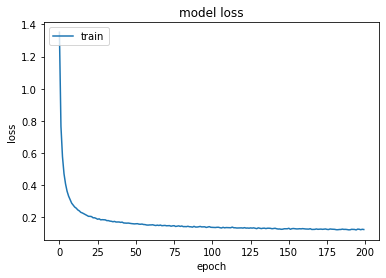

UNet Mid  2 Train Accuracy for Feature Count of 30: 0.9547


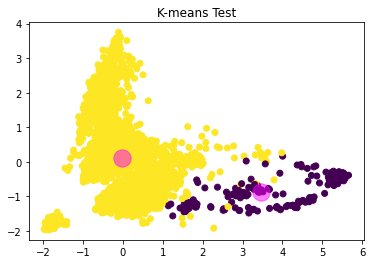

In [15]:
if en_type == 'k':
  #K Ensemble UNet Set
  K_Ensemble_UNet_acc,best_y_pred_CE,best_y_test_CE,cluster_model,class_models = K_Ensemble_UNet(x,y,ds,num_epochs = 200, class_num = cls, clusters = clusters,return_all = True,ws = patch_size)

elif en_type == 'g':
  #G Ensemble UNet Set
  G_Ensemble_UNet_acc,best_y_pred_CE,best_y_test_CE,cluster_model,class_models = G_Ensemble_UNet(x,y,ds,num_epochs = 200, class_num = cls, clusters = clusters,return_all = True,ws = patch_size)
  

### Testing Results

#### Single U-Net

Get class-wise classification summary, overall accuracy (OA), average accuracy (AA) and kappa score for Single U-Net.

In [16]:
classification, confusion, Test_Loss, Test_accuracy, oa, each_acc, aa, kappa = reports(best_x_test,best_y_test,dataset[ds],best_model)

201/201 [==============================] - 1s 4ms/step - loss: 0.1087 - accuracy: 0.9592


In [17]:
print(classification)

                      precision    recall  f1-score   support

             Asphalt       0.98      0.95      0.96      1014
             Meadows       0.98      0.99      0.98      2845
              Gravel       0.87      0.77      0.82       311
               Trees       0.99      0.95      0.97       444
Painted metal sheets       1.00      1.00      1.00       211
           Bare Soil       0.97      0.94      0.95       714
             Bitumen       0.91      0.95      0.93       226
Self-Blocking Bricks       0.84      0.92      0.88       511
             Shadows       1.00      1.00      1.00       141

            accuracy                           0.96      6417
           macro avg       0.95      0.94      0.94      6417
        weighted avg       0.96      0.96      0.96      6417



In [18]:
print("Overall Accuracy: ",oa)

Overall Accuracy:  95.91709521583294


In [19]:
print("Average Accuracy: ", aa)

Average Accuracy:  94.18535610509467


In [20]:
print("Kappa Score: ",kappa)

Kappa Score:  94.53999914848546


#### CEU-Net

Get class-wise classification summary, overall accuracy (OA), average accuracy (AA) and kappa score for CEU-Net.

In [21]:
classification, confusion, oa, each_acc, aa, kappa = reports_CE(best_y_pred_CE,best_y_test_CE,dataset[ds])

In [22]:
print(classification)

                      precision    recall  f1-score   support

             Asphalt       0.98      0.96      0.97      1002
             Meadows       0.98      0.99      0.99      2767
              Gravel       0.89      0.88      0.88       327
               Trees       0.98      0.97      0.97       461
Painted metal sheets       1.00      1.00      1.00       192
           Bare Soil       0.97      0.95      0.96       753
             Bitumen       0.92      0.96      0.94       202
Self-Blocking Bricks       0.89      0.92      0.91       583
             Shadows       1.00      1.00      1.00       130

            accuracy                           0.97      6417
           macro avg       0.96      0.96      0.96      6417
        weighted avg       0.97      0.97      0.97      6417



In [23]:
print("Overall Accuracy: ",oa)

Overall Accuracy:  96.63394109396914


In [24]:
print("Average Accuracy: ", aa)

Average Accuracy:  95.78921797600259


In [25]:
print("Kappa Score: ",kappa)

Kappa Score:  95.55159920206381


### CEU-Net Classification Map

Pad original data for patching.

In [26]:
print("Pre Padding size: ",x.shape)
x_padded = padWithZeros(x, patch_size//2)
print("Padded Size: ",x_padded.shape)

Pre Padding size:  (610, 340, 30)
Padded Size:  (610, 340, 30)


Create classification map from CEU-Net Model Predictions.

In [27]:
# calculate the predicted image for multiple networks

height = y.shape[0]
width = y.shape[1]

outputs = np.zeros((height,width))
for i in trange(height):
    for j in range(width):
        target = int(y[i,j])
        if target == 0 :
            continue
        else :
            image_patch=Patch(x,i,j,patch_size) 
            # print(image_patch.shape)
            X_test_image = image_patch.reshape(1,image_patch.shape[0]* image_patch.shape[1]* image_patch.shape[2]).astype('float64')     
            # print(X_test_image.shape)   
            X_test_pred = cluster_model.predict(X_test_image)     
            # print(X_test_pred)                      
            X_test_image = image_patch.reshape(1,patch_size,patch_size, image_patch.shape[-1]).astype('float32')  
            prediction = class_models[X_test_pred[0]].predict(X_test_image)
            prediction = prediction.reshape(prediction.shape[-1])
            prediction = np.argmax(prediction, axis=0)
            outputs[i][j] = prediction+1

100%|██████████████████████████████████████████████████████████████████████████████| 610/610 [2:50:54<00:00, 16.81s/it]


Show classification map.

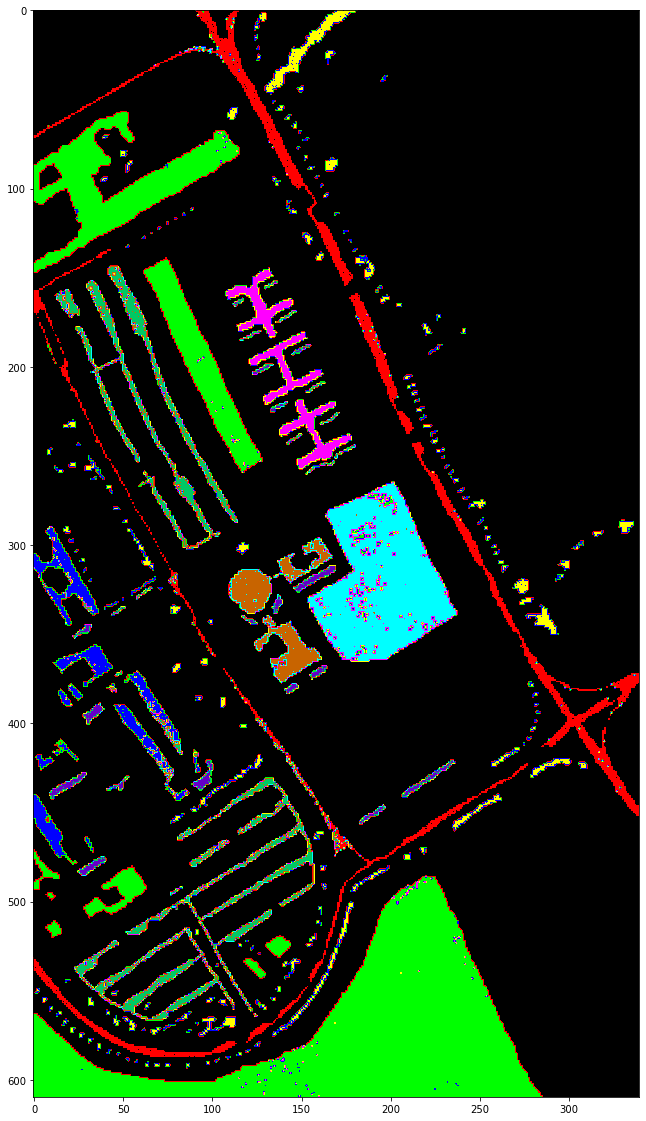

In [28]:
predicted_labels = spectral.imshow(classes = outputs.astype(int),figsize =(20,20))